# logistic Reg in binaryclassifier but on single input with binary output ie 1 / 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns 
df=pd.read_csv("logistic regression dataset-Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# we need age vs Purchased only other drop it 

In [4]:
df.drop(columns=df.iloc[:,:2],inplace=True)

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
df.drop(columns="EstimatedSalary",inplace=True,axis=1)

In [7]:
df

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


In [8]:
df.isnull().sum()

Age          0
Purchased    0
dtype: int64

In [9]:
df.shape

(400, 2)

In [10]:
x=df[["Age"]]
y=df["Purchased"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [31]:
lg.fit(x_train,y_train)


LogisticRegression()

In [32]:
lg.score(x_test,y_test)*100 # model accuracy 

91.25

In [17]:
lg.predict([[50]])

C:\Users\ansar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

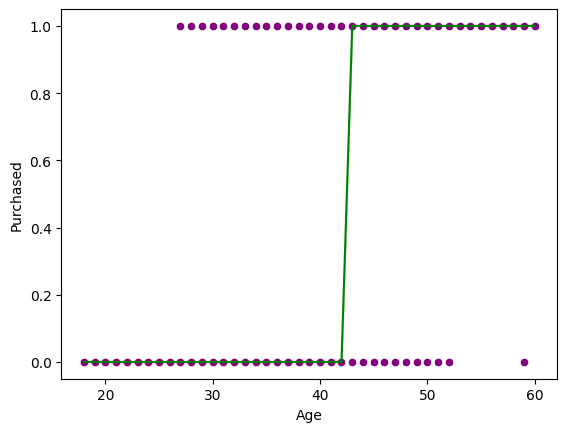

In [28]:
sns.scatterplot(x="Age",y="Purchased",data=df,color="purple")
sns.lineplot(x="Age",y=lg.predict(x),data=df,color="green")
plt.savefig("Logistic S-Shape fig.jpg")
plt.show()

In [29]:
lg.predict([[20]]) # from above diagram shows 20 to 42 is zero and one prediction from 42 to 60 by greeen line show 

C:\Users\ansar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# This image appears to be a logistic regression decision boundary plot. The x-axis represents Age, and the y-axis represents Purchased (0 or 1).

# The purple dots represent individual data points.
# The green curve is the decision boundary, showing the model's predicted probability of purchase based on age.
# The sharp transition around age 40-45 suggests that the model classifies users as likely to purchase (1) or not (0) based on this threshold.
# This is a typical S-shaped (sigmoid) curve seen in logistic regression, which predicts probabilities for binary classification.